
## Overview:   
This notebook demonstrates how to leverage different data formats for OMXWare results for downstream analysis.


In [1]:
%matplotlib inline

import json
from IPython.display import display

import omxware


# --- Authentication options --- #
# generate token with OMXWare user name and password (likely done once and then stored in file, see usage below)
# token = omxware.get_token('harsha', '<pwd>') # fill in password to initiate token

# or

# use previously generated token loaded from file
token_path = "./omxware_collaborative_work/super_awesome_token"  # update for your path to the token file you create
f = open(token_path)
token = f.readline()

# provide your token to authenticate with OMXWare
omx = omxware.omxware(token)

### Retrieve gene data from OMXWare as a Pandas Dataframe

In [2]:
search_string = 'sporulation'
response = omx.genes(gene_name=search_string, page_size=25)

#total_results = response.total_results()
#print(total_results)

results_df = response.results(type='df')
results_df.head()

,classification,genera,genomes,id,name,omx_creation_ts,omx_modified_ts,sequence_length,status,type
0,[bacteria],[bacillus],[GCF_000338315.1],1600e340fae4151d651adad67f2c0fc7,[Sporulation kinase E],2018-01-26T18:16:23.000-08:00,2018-01-26T18:16:23.000-08:00,1209,active,gene
1,[bacteria],[bacillus],[GCF_001277355.1],39594227e62a141edebfe3e13ab055c4,[Sporulation protein YjcA],2018-02-04T13:33:06.000-08:00,2018-02-04T13:33:06.000-08:00,366,active,gene
2,[bacteria],[pseudomonas],[GCF_000744215.1],4e803d52fe7a74f0b51800f92544014b,[Sporulation kinase A],2018-02-04T21:57:39.000-08:00,2018-02-04T21:57:39.000-08:00,2955,active,gene
3,[bacteria],[bacillus],[GCF_001548215.1],32ca676ddb40e11a704ad385cad60161,[Sporulation kinase E],2018-02-04T14:55:24.000-08:00,2018-02-04T14:55:24.000-08:00,3363,active,gene
4,[bacteria],[bacillus],"[GCA_009789615.1, GCF_009789615.1]",0a5d47e939f9d2a10ccdb90646d49960,[Sporulation protein cse15],2020-01-03T11:34:22.000-08:00,2020-02-07T22:54:30.000-08:00,993,active,gene


### Distribution of Genes by Genera

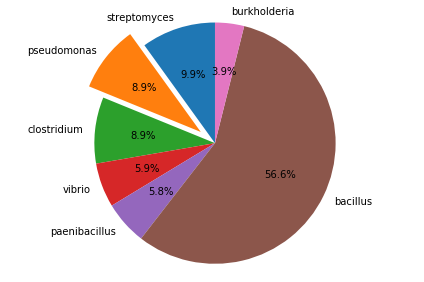

In [3]:
response.show_facets(name='genera', topN=7)

### Retrieve gene data from OMXWare as JSON

In [4]:
results_json = response.results(type='json')
print(json.dumps(results_json[:3], indent=4, sort_keys=True))

[
    {
        "classification": [
            "bacteria"
        ],
        "genera": [
            "bacillus"
        ],
        "genomes": [
            "GCF_000338315.1"
        ],
        "id": "1600e340fae4151d651adad67f2c0fc7",
        "name": [
            "Sporulation kinase E"
        ],
        "omx_creation_ts": "2018-01-26T18:16:23.000-08:00",
        "omx_modified_ts": "2018-01-26T18:16:23.000-08:00",
        "sequence_length": 1209,
        "status": "active",
        "type": "gene"
    },
    {
        "classification": [
            "bacteria"
        ],
        "genera": [
            "bacillus"
        ],
        "genomes": [
            "GCF_001277355.1"
        ],
        "id": "39594227e62a141edebfe3e13ab055c4",
        "name": [
            "Sporulation protein YjcA"
        ],
        "omx_creation_ts": "2018-02-04T13:33:06.000-08:00",
        "omx_modified_ts": "2018-02-04T13:33:06.000-08:00",
        "sequence_length": 366,
        "status": "active",
       

### Retrieve gene data from OMXWare as an Object

In [5]:
results_list = response.results(type='list')

# By default, the API returns a `list`
print("Returns: List of {} objects \nResults: {}\n".format(response.type(), response.total_results()) )
    
gene = results_list[0]

print("Id  \t\t=> " + gene.id())
print("Name   \t\t=> " + ','.join(gene.name())) 
# note: since one sequence can have multiple names, gene and protein names are returned as a list

print("Sequence   \t=> " + gene.sequence()[:100] + "...")
print("Sequence length => " + str(gene.sequence_length()))

print("\n\n JSON:")
print(gene.json())

Returns: List of gene objects 
Results: 106316

Id  		=> 1600e340fae4151d651adad67f2c0fc7
Name   		=> Sporulation kinase E
Sequence   	=> ATGCTCGTATACCATTTATTTTGGAATCAAAAAGGGAAACGTTCTCCTAAATTAAATTCAACTATATTTATTACATTATGTTGCCTCGCTACCATACTAT...
Sequence length => 1209


 JSON:
{'id': '1600e340fae4151d651adad67f2c0fc7', 'name': ['Sporulation kinase E'], 'type': 'gene', 'genera': ['bacillus'], 'genomes': ['GCF_000338315.1'], 'sequence_length': 1209, 'status': 'active', 'omx_creation_ts': '2018-01-26T18:16:23.000-08:00', 'omx_modified_ts': '2018-01-26T18:16:23.000-08:00', 'classification': ['bacteria']}


### Retrieve gene data from OMXWare as FASTA

In [8]:
new_gene_object = omx.genes(ids='00054a98f8ddd95e3f46d9d757137284').results(type='fasta')
print(new_gene_object)

>OMX_gene_00054a98f8ddd95e3f46d9d757137284|Sensor histidine kinase RcsC,Sporulation initiation phosphotransferase F
ATGAACGAGAAGGTGCTGCTGGTTGACGACGACGAGGCCATCCGCGAAGTCCTCAGCCTCTCCATCGCCGACCTGGGCTACGACGTGGAAACCGCCCCCGGCGGCCGCGAAGCCCTGGAGCTGTGCGCCACCTTCAAACCGTCCATCGTGCTCACCGACATCAAGATGCCCGGCATGGACGGCATCGAACTGCTCTCGCGCGTCAAAGCCCTCGATCCCGAGATCGAGGTCATCATGATTTCCGGCCATGGCGACATGGAACTGGCCATCGAGAGCCTCAAGCGCCAGGCCCTGGATTTCCTCACCAAGCCCGTGCGCGACGAACTGCTCACAGCCTCCCTCCACCGGGCCGCCGACCGCGTGTCCATGCGCCGCCAGATCACCGAACACACCCGCAATCTCGAACGGCTGGTGCGCGAAAAATCCGCCCGCCTGGTCGAGATGGAGCGCCGCATGGCCGTGGGGCAGGCCGTGGAGGGCGTGGCCAGCGCCATCGAGGGGCTCATTGCCTCCTTCGACCAGGGACCCAGCTATTTCAACCAGATGCCCTGCTGCATCGTCATCCACAACCGCTACCTCGAAATCGTGGCCGTAAACACCCTGGGCCGGCAGCGCCTGGGCGAGGTGGTGGGCAAGATGAGCTGGGAACTCTACGCCGACCGTCAGGGCAGCGGCAACGCCTGCCCGGTCTGGCGCACCGTGGAACAAGGCCAGGGCCAGCGCGGCCGCGAGACCTTCCGCGACAAGGACGGCCGCGAGATTCCGGTGCTGATCCATACCGCCCCGGTCTTCGGCACGGACGGCCAGGTGGAGCTGGTCATCGAGATCGCCGCCGACGTGGCCGAGGTGGGCCGGCTCCAGGAAGAGCTGCGGGCCGTGCGCGA

### Retrieve Gene query results as fasta

In [9]:
results_fasta = response.results(type='fasta')
print(results_fasta)

>OMX_gene_1600e340fae4151d651adad67f2c0fc7|Sporulation kinase E
ATGCTCGTATACCATTTATTTTGGAATCAAAAAGGGAAACGTTCTCCTAAATTAAATTCAACTATATTTATTACATTATGTTGCCTCGCTACCATACTATGTATTACTTTCGGAGCAAAAACAAATTATGGATTTCAATTTGATATGCGTCATATCGTATTAATTGTCGGTACATTAACAGGAGGTCCTATTGCCGGTGCTTCCATCTTAGCTGTATTAAACATATATCGCTTTTTATTAGGCGGAATTGGTGTCTTTCCATCCCTTATCGCCTCGGTTCTACTGTTTATCGTTCTACTGTTAACATACAAACTATTTAACCGCAGTTCTAATCGTATAAAAATAGCACTCGCTATCTTTTACAGTCTCATATTTGGCTTGGGCTGGATACCATCTTTCCTTTCAGAGGTTACAAATAGCGCAGATTACATACCACATATTATCGTGTACGAAATATGTACAATAATTGGAACAATTCTTATCTTATATTTGCTACATATACTACAAATGCAAGTTCGTCTTCAAAACGAACTTATGAATGCTGAAAAATTCCATTTAATCGGCGAAATGGCAGCGTCTATCTCTCATGAGATTCGCAATCCATTAACTTCAACAAAAGGATTTTTACAACTTTTGCAGTCAGATACATGCACTGAGCAAGAGCGAAAATTATATATCGACATAGCCATCAACGGAATCGAACAAGCAAATCATGTTCTTACAGACTGCTTAACTTTTGCGAAACCAAGTATTGAAAAAGAACAACAATTACAAGTAGAGGAAGAATTATTGCATGCCTTATCTTTAATCACACCTCTTGCTAATTTAACAAATGTTCGTATCCACTACATCAAACAAAGTACATCTTTCTTTATTGCTGGTGAAAAACAAAAACTGAACCAATGTTTATTAAATATTTTCAAAAACTGTATTGAG